# Importing Packages

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential,load_model
from keras.layers import Dense,Dropout
from keras.layers import Conv2D,MaxPooling2D,Flatten
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


# Reading the dataset

In [2]:
data_gen = ImageDataGenerator(rescale=1./250)
train_data = data_gen.flow_from_directory('D:/AI(verzeo)/majorproject/datasets/train_data/',target_size=(100,100),batch_size=60,class_mode='categorical',color_mode='grayscale')
test_data = data_gen.flow_from_directory('D:/AI(verzeo)/majorproject/datasets/test_data/',target_size=(100,100),batch_size=20,class_mode='categorical',color_mode='grayscale')

Found 4600 images belonging to 2 classes.
Found 420 images belonging to 2 classes.


# Creating Model and Compiling the Model

In [3]:
model = Sequential()
model.add(Conv2D(100,(3,3),input_shape=(100,100,1),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(75,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=2,activation='softmax'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Fitting the Model

In [4]:
checkpoint = ModelCheckpoint('face__mask___model-{epoch:05d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
checkpoint_acc = ModelCheckpoint('face_mask__model-{epoch:05d}.model',monitor='val_accuracy',verbose=0,save_best_only=True,mode='auto')
his = model.fit_generator(train_data,steps_per_epoch=4600/60,epochs=10,callbacks=[checkpoint,checkpoint_acc],validation_data=test_data,validation_steps=420/20)

Epoch 1/10
13/76 [====>.........................] - ETA: 1:27 - loss: 0.7764 - accuracy: 0.5615

D:\Anaconda3\envs\tensorflow\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


77/76 [==============================] - 99s 1s/step - loss: 0.6334 - accuracy: 0.6428 - val_loss: 0.6666 - val_accuracy: 0.6976
Epoch 2/10
77/76 [==============================] - 116s 2s/step - loss: 0.4224 - accuracy: 0.8207 - val_loss: 0.2871 - val_accuracy: 0.8690
Epoch 3/10
77/76 [==============================] - 137s 2s/step - loss: 0.2672 - accuracy: 0.8900 - val_loss: 0.2302 - val_accuracy: 0.9190
Epoch 4/10
77/76 [==============================] - 133s 2s/step - loss: 0.1802 - accuracy: 0.9296 - val_loss: 0.0465 - val_accuracy: 0.9500
Epoch 5/10
77/76 [==============================] - 102s 1s/step - loss: 0.1232 - accuracy: 0.9515 - val_loss: 0.0975 - val_accuracy: 0.9690
Epoch 6/10
77/76 [==============================] - 101s 1s/step - loss: 0.0832 - accuracy: 0.9670 - val_loss: 0.0190 - val_accuracy: 0.9786
Epoch 7/10
77/76 [==============================] - 133s 2s/step - loss: 0.0565 - accuracy: 0.9800 - val_loss: 0.1728 - val_accuracy: 0.9810
Epoch 8/10
77/76 [=======

# Plotting the Accuracy Graph

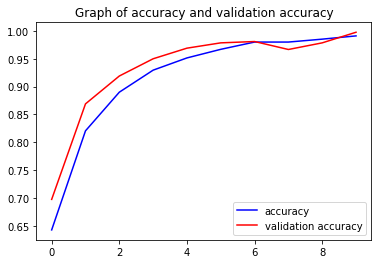

In [5]:
plt.plot(his.history['accuracy'],'b',label='accuracy')
plt.plot(his.history['val_accuracy'],'r',label='validation accuracy')
plt.title('Graph of accuracy and validation accuracy')
plt.legend()
plt.show()

# Plotting the Loss Graph

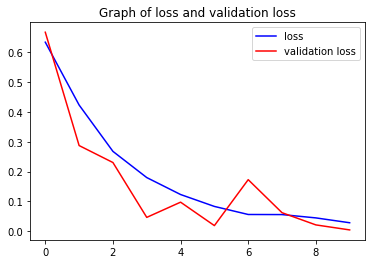

In [6]:
plt.plot(his.history['loss'],'b',label='loss')
plt.plot(his.history['val_loss'],'r',label='validation loss')
plt.title('Graph of loss and validation loss')
plt.legend()
plt.show()

# Saving the Model

In [7]:
model.save('Face_Mask_Model.model')